In [21]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [78]:
# initializing constants
K = 1.
s = 1.
ao = 1.
io = 1.
L = 1.
n = 1
F = 96485
R = 8.314
T = 298
I = 1.


#graph analytically
X = np.linspace(0., L, 100)
Y=y = X/L
v = L*np.sqrt(ao*io*(n*F)/(R*T)*(K + s)/(K*s))
i2 = I * K/(K + s)*(1 + (s*(K**-1)*np.sinh(v*(1-y)) - np.sinh(v*y))/np.sinh(v))

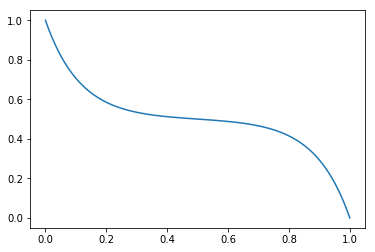

In [79]:
plt.plot(X, i2)

In [88]:
#solve numerically
def simplebattfunc(i, x):
    i0, i1 = i
    di = i1
    d2i = ao*io*(n*F)/(R*T)*(-I/s + i0*(1/s + 1/K))
    return di, d2i

def batteryfunc(IV, x):
    i1, i2, V1, V2 = IV
    I = i1 + i2
    di2dx = ao*io*(n*F)/(R*T)(V1 - V2)
    

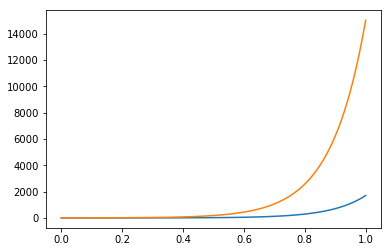

In [89]:
t = np.linspace(0., 1., 100)
i2 = odeint(simplebattfunc, [I, 0], t)
plt.plot(t, i2)

1701.63727653
1701.63727653
1701.63727653
1701.63728227
1601.63815674
1401.6401953
1001.64456047
201.653101692
1.39791037055e-05
1.7129367369e-11
1.01307850997e-12
-4.41397032295


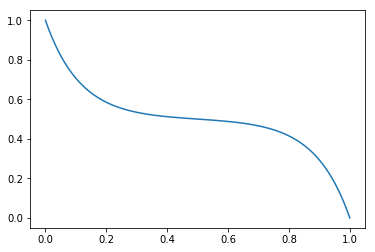

In [90]:
from scipy.optimize import fsolve

u1_0 = I
def objective(u2_0):
    """
    The thing we want to set equal to zero
    """
    U = odeint(simplebattfunc, [u1_0, u2_0], t)
    print(U[-1,0])
    return U[-1,0]

u2_0, = fsolve(objective, 0)
print(u2_0)

i = odeint(simplebattfunc, [u1_0, u2_0], t)
plt.plot(t, i[:,0])